TypeError: list indices must be integers or slices, not numpy.float64

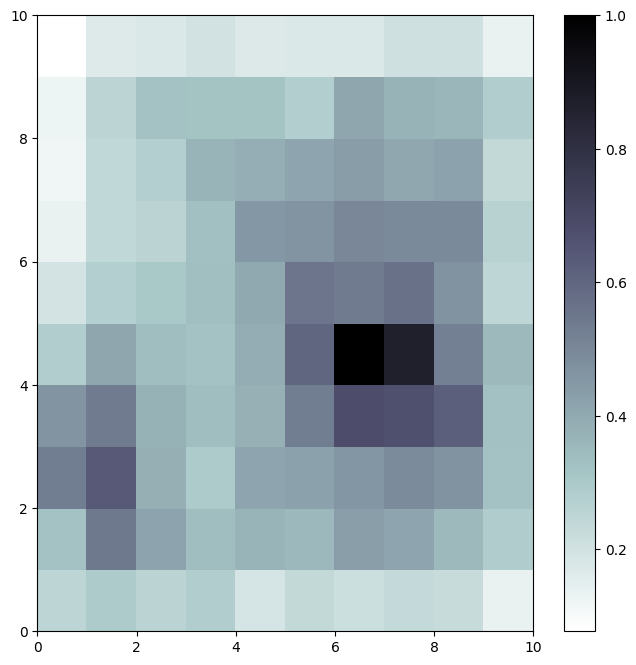

In [1]:
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# Definir os nomes das colunas
names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
# Carregar o conjunto de dados
data = pd.read_csv(url, names=names)

# Selecionar apenas os atributos numéricos
X = data.drop(['id', 'diagnosis'], axis=1)

# Normalizar os dados
X = (X - X.mean()) / X.std()

# Mapeamento das classes 'M' e 'B' para 1 e 0, respectivamente
diagnosis_map = {'M': 1, 'B': 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

# Dimensões do mapa (ajuste conforme necessário)
som = MiniSom(10, 10, X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X.values)
som.train_random(X.values, 1000)  # Número de iterações

# Plotar o mapa de ativação
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Matriz de distância transposta
plt.colorbar()

# Adicionar marcadores para os diagnósticos (cores diferentes para maligno e benigno)
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X.values):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[data.iloc[i]['diagnosis']], markerfacecolor='None', markeredgecolor=colors[data.iloc[i]['diagnosis']], markersize=10, markeredgewidth=2)

plt.title('Mapa de Ativação dos Neurônios')
plt.show()

# Identificar outliers (neurônios com maior distância média)
outliers = []
for x in X.values:
    w = som.winner(x)
    avg_distance = np.mean([np.linalg.norm(x - som.weights[w]) for w in np.ndindex(som.weights.shape[:2])])
    outliers.append((w, avg_distance))

# Ordenar os neurônios por distância média em ordem decrescente
outliers.sort(key=lambda x: x[1], reverse=True)

# Identificar os dois neurônios com maiores distâncias médias
outlier_neurons = [o[0] for o in outliers[:2]]
print("Neurônios identificados como outliers:", outlier_neurons)


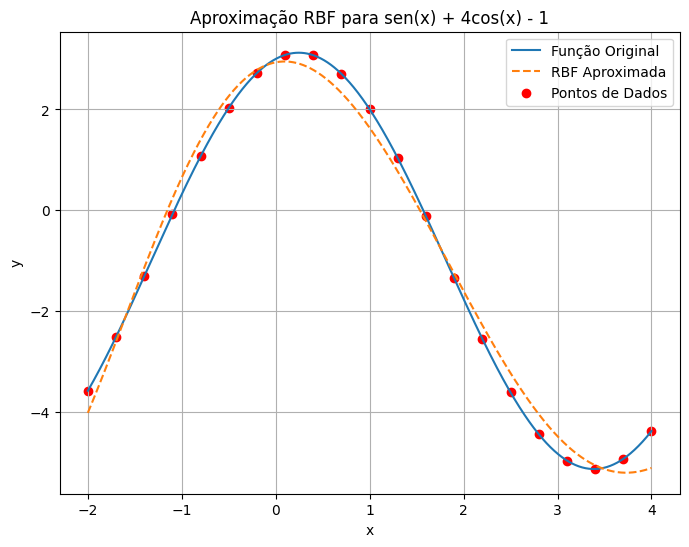

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função a ser aproximada
def f(x):
    return np.sin(x) + 4 * np.cos(x) - 1

# Gerar 21 pontos no intervalo [-2, 4]
x = np.linspace(-2, 4, 21)
y = f(x)

# Selecionar 4 centros aleatoriamente
np.random.seed(42)  # Para reprodutibilidade
indices = np.random.choice(len(x), 4, replace=False)
centers = x[indices]

# Calcular as distâncias entre os pontos e os centros
distances = np.abs(x[:, None] - centers)

# Parâmetro sigma para as funções de base radial
sigma = np.mean(np.std(distances, axis=0))

# Calcular a matriz de ativação
phi = np.exp(-0.5 * (distances / sigma)**2)

# Calcular os pesos da rede
weights = np.linalg.lstsq(phi, y, rcond=None)[0]

# Definir uma função para prever valores usando a RBF
def predict_rbf(x):
    distances = np.abs(x[:, None] - centers)
    phi = np.exp(-0.5 * (distances / sigma)**2)
    return np.dot(phi, weights)

# Gerar pontos para o gráfico da função aproximada
x_pred = np.linspace(-2, 4, 1000)
y_pred = predict_rbf(x_pred)

# Plotar a função original e a aproximada pela RBF
plt.figure(figsize=(8, 6))
plt.plot(x_pred, f(x_pred), label='Função Original')
plt.plot(x_pred, y_pred, label='RBF Aproximada', linestyle='--')
plt.scatter(x, y, color='red', label='Pontos de Dados')
plt.title('Aproximação RBF para sen(x) + 4cos(x) - 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Epoch [100/10000], Loss: 5.7270
Epoch [200/10000], Loss: 1.6566
Epoch [300/10000], Loss: 1.2179
Epoch [400/10000], Loss: 1.1703
Epoch [500/10000], Loss: 1.1395
Epoch [600/10000], Loss: 1.1183
Epoch [700/10000], Loss: 1.1059
Epoch [800/10000], Loss: 1.0986
Epoch [900/10000], Loss: 1.0938
Epoch [1000/10000], Loss: 1.0902
Epoch [1100/10000], Loss: 1.0871
Epoch [1200/10000], Loss: 1.0842
Epoch [1300/10000], Loss: 1.0813
Epoch [1400/10000], Loss: 1.0783
Epoch [1500/10000], Loss: 1.0754
Epoch [1600/10000], Loss: 1.0724
Epoch [1700/10000], Loss: 1.0694
Epoch [1800/10000], Loss: 1.0665
Epoch [1900/10000], Loss: 1.0637
Epoch [2000/10000], Loss: 1.0611
Epoch [2100/10000], Loss: 1.0586
Epoch [2200/10000], Loss: 1.0564
Epoch [2300/10000], Loss: 1.0544
Epoch [2400/10000], Loss: 1.0527
Epoch [2500/10000], Loss: 1.0512
Epoch [2600/10000], Loss: 1.0500
Epoch [2700/10000], Loss: 1.0490
Epoch [2800/10000], Loss: 1.0482
Epoch [2900/10000], Loss: 1.0475
Epoch [3000/10000], Loss: 1.0471
Epoch [3100/10000],

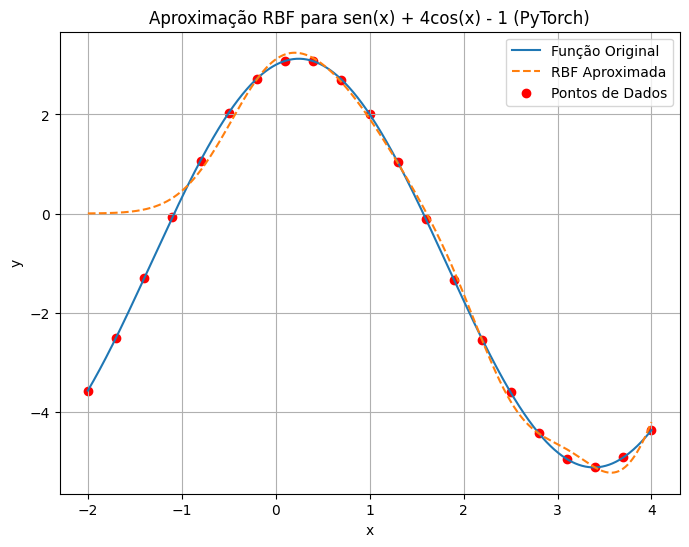

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Definir a função a ser aproximada
def f(x):
    return torch.sin(x) + 4 * torch.cos(x) - 1

# Gerar 21 pontos no intervalo [-2, 4]
x = torch.linspace(-2, 4, 21).reshape(-1, 1)
y = f(x)

# Selecionar 4 centros aleatoriamente
torch.manual_seed(43)  # Para reprodutibilidade
indices = torch.randperm(len(x))[:4]
centers = x[indices]

# Calcular as distâncias entre os pontos e os centros
distances = torch.abs(x - centers.T)

# Parâmetro sigma para as funções de base radial
sigma = torch.mean(torch.std(distances, axis=0))

# Definir a classe da Rede Neural RBF
class RBF(nn.Module):
    def __init__(self, in_features, num_centers):
        super(RBF, self).__init__()
        self.centers = nn.Parameter(centers)
        self.weights = nn.Parameter(torch.randn(num_centers, 1))
        self.sigma = nn.Parameter(sigma)

    def forward(self, x):
        distances = torch.abs(x - self.centers.T)
        phi = torch.exp(-0.5 * (distances / self.sigma)**2)
        return torch.matmul(phi, self.weights)

# Instanciar a Rede Neural RBF
rbf = RBF(in_features=1, num_centers=4)

# Definir a função de perda e o otimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rbf.parameters(), lr=0.01)

# Treinamento da rede
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = rbf(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Gerar pontos para o gráfico da função aproximada
x_pred = torch.linspace(-2, 4, 1000).reshape(-1, 1)
with torch.no_grad():
    y_pred = rbf(x_pred)

# Plotar a função original e a aproximada pela RBF
plt.figure(figsize=(8, 6))
plt.plot(x_pred.numpy(), f(x_pred).numpy(), label='Função Original')
plt.plot(x_pred.numpy(), y_pred.numpy(), label='RBF Aproximada', linestyle='--')
plt.scatter(x.numpy(), y.numpy(), color='red', label='Pontos de Dados')
plt.title('Aproximação RBF para sen(x) + 4cos(x) - 1 (PyTorch)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100, Loss: 9.860862731933594


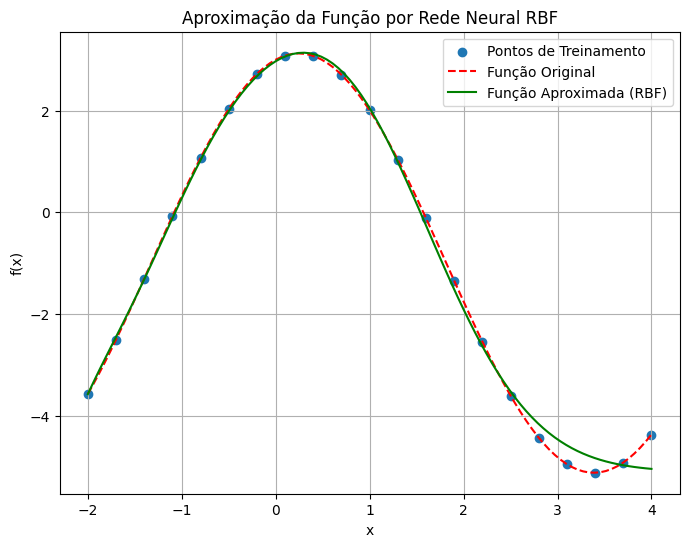

In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Definir a função a ser aproximada: f(x) = sen(x) + 4cos(x) - 1
def original_function(x):
    return torch.sin(x) + 4 * torch.cos(x) - 1

# Gerar os 21 pontos do intervalo [-2, 4]
x_train = torch.linspace(-2, 4, 21)
y_train = original_function(x_train)

# Criar a rede neural RBF com 4 centros
class RBFNet(torch.nn.Module):
    def __init__(self, input_dim, num_centers):
        super(RBFNet, self).__init__()
        self.centers = torch.nn.Parameter(torch.Tensor(num_centers, input_dim))
        self.beta = torch.nn.Parameter(torch.ones(num_centers))
        self.linear = torch.nn.Linear(num_centers, 1)

        # Inicializar os centros de forma aleatória
        self.centers.data = torch.Tensor(np.random.uniform(-2, 4, (num_centers, input_dim)))

    def forward(self, x):
        # Calcular as distâncias entre os pontos de entrada e os centros
        dist = torch.cdist(x, self.centers)
        # Aplicar a função de ativação RBF: f(r) = exp(-beta * r^2)
        rbf_out = torch.exp(-self.beta * dist.pow(2))
        # Realizar a combinação linear dos resultados RBF
        out = self.linear(rbf_out)
        return out

# Definir a função para treinar a rede
def train(model, x_train, y_train, epochs=100, lr=0.1):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train.unsqueeze(1))
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Criar a instância da rede RBF
model = RBFNet(input_dim=1, num_centers=4)

# Treinar a rede com os dados
train(model, x_train, y_train)

# Gerar a previsão da função aproximada pela RBF
x_test = torch.linspace(-2, 4, 100)
with torch.no_grad():
    predicted = model(x_test.unsqueeze(1)).squeeze().numpy()

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Pontos de Treinamento')
plt.plot(x_test.numpy(), original_function(x_test).numpy(), label='Função Original', linestyle='--', color='red')
plt.plot(x_test.numpy(), predicted, label='Função Aproximada (RBF)', linestyle='-', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximação da Função por Rede Neural RBF')
plt.grid(True)
plt.show()
